Task 1

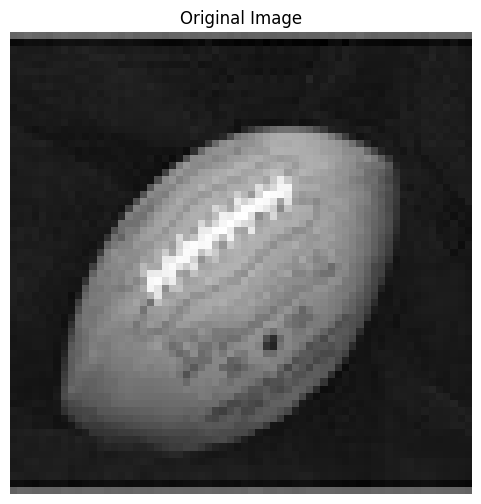

Computing the DFT...
Shifting the spectrum...
Computing the magnitude spectrum...
Applying logarithmic transformation...
Normalizing the spectrum for display...


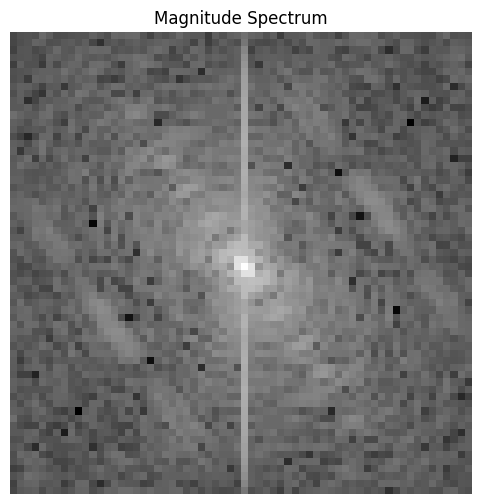

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

# Load the Image
def load_image(path):
    # Open the image and convert to grayscale
    image = Image.open(path).convert('L')
    # Resize the image to 64x64 or 128x128 pixels if necessary
    image = image.resize((64, 64), Image.LANCZOS)
    # Convert image to a numpy array
    img_array = np.array(image)
    return img_array

# Define a Complex Number Class
class ComplexNumber:
    def __init__(self, real=0.0, imag=0.0):
        self.real = real
        self.imag = imag

    def __add__(self, other):
        return ComplexNumber(self.real + other.real, self.imag + other.imag)

    def __mul__(self, other):
        return ComplexNumber(self.real * other.real - self.imag * other.imag,
                             self.real * other.imag + self.imag * other.real)

    def magnitude(self):
        return math.sqrt(self.real ** 2 + self.imag ** 2)

# Compute the 2D DFT
def compute_dft(image):
    M, N = image.shape
    dft_result = [[ComplexNumber() for _ in range(N)] for _ in range(M)]
    for u in range(M):
        for v in range(N):
            sum_value = ComplexNumber()
            for x in range(M):
                for y in range(N):
                    pixel = image[x][y]
                    angle = -2 * math.pi * ((u * x) / M + (v * y) / N)
                    exp_value = ComplexNumber(math.cos(angle), math.sin(angle))
                    sum_value += exp_value * ComplexNumber(pixel, 0)
            dft_result[u][v] = sum_value
    return dft_result

# Shift the Origin of the Spectrum
def shift_spectrum(dft_result):
    M, N = len(dft_result), len(dft_result[0])
    shifted_dft = [[ComplexNumber() for _ in range(N)] for _ in range(M)]
    for x in range(M):
        for y in range(N):
            shifted_dft[x][y] = dft_result[(x + M // 2) % M][(y + N // 2) % N]
    return shifted_dft

# Compute the Magnitude Spectrum
def compute_magnitude_spectrum(dft_result):
    M, N = len(dft_result), len(dft_result[0])
    magnitude_spectrum = np.zeros((M, N))
    for u in range(M):
        for v in range(N):
            magnitude_spectrum[u][v] = dft_result[u][v].magnitude()
    return magnitude_spectrum

# Apply Logarithmic Transformation
def logarithmic_transform(magnitude_spectrum):
    return np.log(1 + magnitude_spectrum)

# Normalize the Spectrum for Display
def normalize_spectrum(spectrum):
    spectrum -= spectrum.min()
    spectrum *= 255.0 / spectrum.max()
    return spectrum.astype(np.uint8)

# Main Function
def main():
    # Load the image
    image_path = 'football_64x64_grayscale.jpg'
    image = load_image(image_path)

    # Display the original image
    plt.figure(figsize=(6, 6))
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

    # Compute the DFT
    print("Computing the DFT...")
    dft_result = compute_dft(image)

    # Shift the spectrum
    print("Shifting the spectrum...")
    shifted_dft = shift_spectrum(dft_result)

    # Compute the magnitude spectrum
    print("Computing the magnitude spectrum...")
    magnitude_spectrum = compute_magnitude_spectrum(shifted_dft)

    # Apply logarithmic transformation
    print("Applying logarithmic transformation...")
    log_spectrum = logarithmic_transform(magnitude_spectrum)

    # Normalize the spectrum
    print("Normalizing the spectrum for display...")
    normalized_spectrum = normalize_spectrum(log_spectrum)

    # Display the magnitude spectrum
    plt.figure(figsize=(6, 6))
    plt.title('Magnitude Spectrum')
    plt.imshow(normalized_spectrum, cmap='gray')
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    main()

Task 2

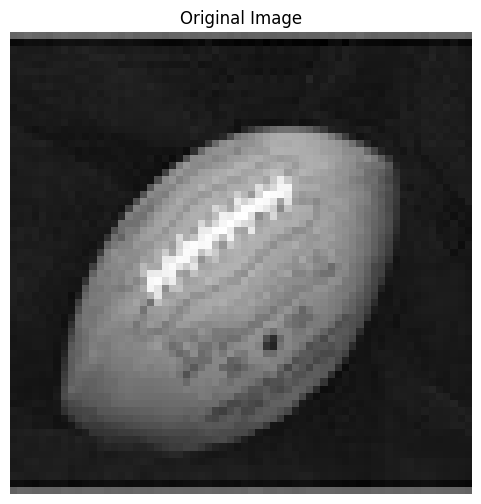

Computing the DFT...
Shifting the spectrum...


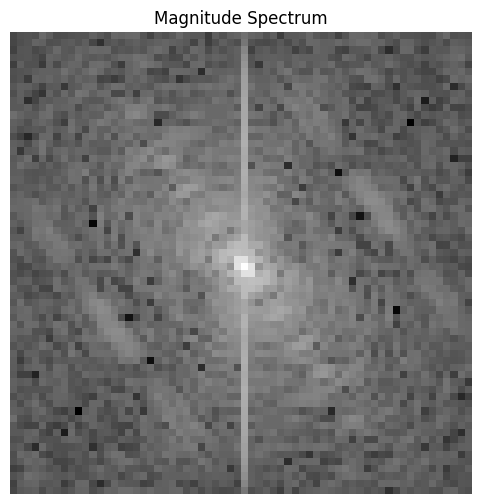

Creating Low-Pass Filter...
Creating High-Pass Filter...
Applying Low-Pass Filter...
Computing Inverse DFT for Low-Pass Filtered Image...
Applying High-Pass Filter...
Computing Inverse DFT for High-Pass Filtered Image...


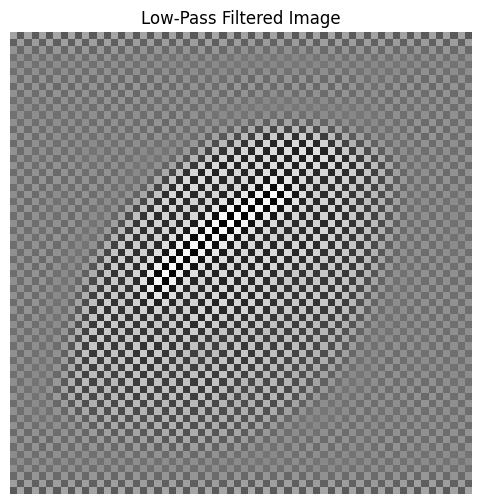

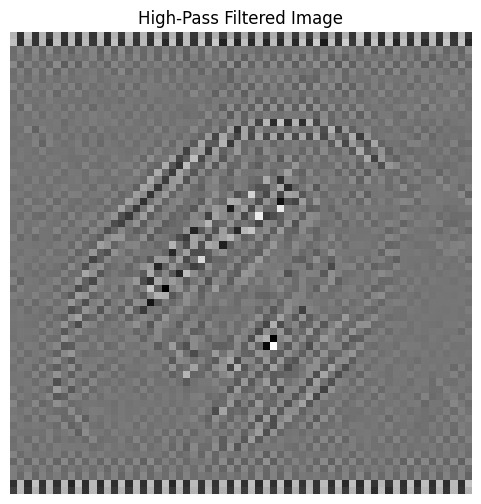

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

# Load the Image
def load_image(path):
    # Open the image and convert to grayscale
    image = Image.open(path).convert('L')
    # Resize the image to 64x64 pixels
    image = image.resize((64, 64), Image.LANCZOS)
    # Convert image to a numpy array
    img_array = np.array(image)
    return img_array

# Define a Complex Number Class
class ComplexNumber:
    def __init__(self, real=0.0, imag=0.0):
        self.real = real
        self.imag = imag

    def __add__(self, other):
        return ComplexNumber(self.real + other.real, self.imag + other.imag)

    def __sub__(self, other):
        return ComplexNumber(self.real - other.real, self.imag - other.imag)

    def __mul__(self, other):
        return ComplexNumber(
            self.real * other.real - self.imag * other.imag,
            self.real * other.imag + self.imag * other.real
        )

    def magnitude(self):
        return math.sqrt(self.real ** 2 + self.imag ** 2)

    def scale(self, scalar):
        return ComplexNumber(self.real * scalar, self.imag * scalar)

# Compute the 2D DFT
def compute_dft(image):
    M, N = image.shape
    dft_result = [[ComplexNumber() for _ in range(N)] for _ in range(M)]
    for u in range(M):
        for v in range(N):
            sum_value = ComplexNumber()
            for x in range(M):
                for y in range(N):
                    pixel = image[x][y]
                    angle = -2 * math.pi * ((u * x) / M + (v * y) / N)
                    exp_value = ComplexNumber(math.cos(angle), math.sin(angle))
                    sum_value += exp_value * ComplexNumber(pixel, 0)
            dft_result[u][v] = sum_value
    return dft_result

# Shift the Origin of the Spectrum
def shift_spectrum(dft_result):
    M, N = len(dft_result), len(dft_result[0])
    shifted_dft = [[ComplexNumber() for _ in range(N)] for _ in range(M)]
    for x in range(M):
        for y in range(N):
            shifted_dft[x][y] = dft_result[(x + M // 2) % M][(y + N // 2) % N]
    return shifted_dft

# Compute the Magnitude Spectrum
def compute_magnitude_spectrum(dft_result):
    M, N = len(dft_result), len(dft_result[0])
    magnitude_spectrum = np.zeros((M, N))
    for u in range(M):
        for v in range(N):
            magnitude_spectrum[u][v] = dft_result[u][v].magnitude()
    return magnitude_spectrum

# Apply Logarithmic Transformation
def logarithmic_transform(magnitude_spectrum):
    return np.log(1 + magnitude_spectrum)

# Normalize the Spectrum for Display
def normalize_spectrum(spectrum):
    spectrum -= spectrum.min()
    spectrum *= 255.0 / spectrum.max()
    return spectrum.astype(np.uint8)

# Design the Filter
def create_filter(filter_type, M, N, D0=10):
    # Create a filter matrix of size MxN
    filter_matrix = np.zeros((M, N))
    center_u, center_v = M // 2, N // 2

    for u in range(M):
        for v in range(N):
            # Compute the distance from the center
            D = math.sqrt((u - center_u) ** 2 + (v - center_v) ** 2)
            if filter_type == 'low':
                # Ideal Low-Pass Filter
                filter_matrix[u][v] = 1.0 if D <= D0 else 0.0
            elif filter_type == 'high':
                # Ideal High-Pass Filter
                filter_matrix[u][v] = 0.0 if D <= D0 else 1.0
    return filter_matrix

# Apply the Filter
def apply_filter(dft_shifted, filter_matrix):
    M, N = len(dft_shifted), len(dft_shifted[0])
    filtered_dft = [[ComplexNumber() for _ in range(N)] for _ in range(M)]
    for u in range(M):
        for v in range(N):
            H = filter_matrix[u][v]
            F = dft_shifted[u][v]
            # Multiply the filter with the DFT value
            filtered_dft[u][v] = F.scale(H)
    return filtered_dft

# Compute the Inverse DFT
def compute_idft(dft_filtered):
    M, N = len(dft_filtered), len(dft_filtered[0])
    idft_result = np.zeros((M, N))
    for x in range(M):
        for y in range(N):
            sum_value = ComplexNumber()
            for u in range(M):
                for v in range(N):
                    Fuv = dft_filtered[u][v]
                    angle = 2 * math.pi * ((u * x) / M + (v * y) / N)
                    exp_value = ComplexNumber(math.cos(angle), math.sin(angle))
                    sum_value += Fuv * exp_value
            # Multiply by (1/MN)
            sum_value = sum_value.scale(1 / (M * N))
            # Take the real part for the spatial domain image
            idft_result[x][y] = sum_value.real
    return idft_result

# Main Function
def main():
    # Load the image
    image_path = 'football_64x64_grayscale.jpg'
    image = load_image(image_path)

    # Display the original image
    plt.figure(figsize=(6, 6))
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

    # Compute the DFT
    print("Computing the DFT...")
    dft_result = compute_dft(image)

    # Shift the spectrum
    print("Shifting the spectrum...")
    dft_shifted = shift_spectrum(dft_result)

    # Compute the magnitude spectrum (for visualization)
    magnitude_spectrum = compute_magnitude_spectrum(dft_shifted)
    log_spectrum = logarithmic_transform(magnitude_spectrum)
    normalized_spectrum = normalize_spectrum(log_spectrum)

    # Display the magnitude spectrum
    plt.figure(figsize=(6, 6))
    plt.title('Magnitude Spectrum')
    plt.imshow(normalized_spectrum, cmap='gray')
    plt.axis('off')
    plt.show()

    # Design Filters
    M, N = image.shape
    D0 = 10  # Cutoff frequency
    print("Creating Low-Pass Filter...")
    low_pass_filter = create_filter('low', M, N, D0)
    print("Creating High-Pass Filter...")
    high_pass_filter = create_filter('high', M, N, D0)

    # Apply Low-Pass Filter
    print("Applying Low-Pass Filter...")
    dft_low_filtered = apply_filter(dft_shifted, low_pass_filter)
    # Apply Inverse DFT
    print("Computing Inverse DFT for Low-Pass Filtered Image...")
    low_filtered_image = compute_idft(dft_low_filtered)

    # Apply High-Pass Filter
    print("Applying High-Pass Filter...")
    dft_high_filtered = apply_filter(dft_shifted, high_pass_filter)
    # Apply Inverse DFT
    print("Computing Inverse DFT for High-Pass Filtered Image...")
    high_filtered_image = compute_idft(dft_high_filtered)

    # Normalize and Display the Low-Pass Filtered Image
    low_filtered_image_normalized = normalize_spectrum(low_filtered_image)
    plt.figure(figsize=(6, 6))
    plt.title('Low-Pass Filtered Image')
    plt.imshow(low_filtered_image_normalized, cmap='gray')
    plt.axis('off')
    plt.show()

    # Normalize and Display the High-Pass Filtered Image
    high_filtered_image_normalized = normalize_spectrum(high_filtered_image)
    plt.figure(figsize=(6, 6))
    plt.title('High-Pass Filtered Image')
    plt.imshow(high_filtered_image_normalized, cmap='gray')
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    main()

Task 3.1

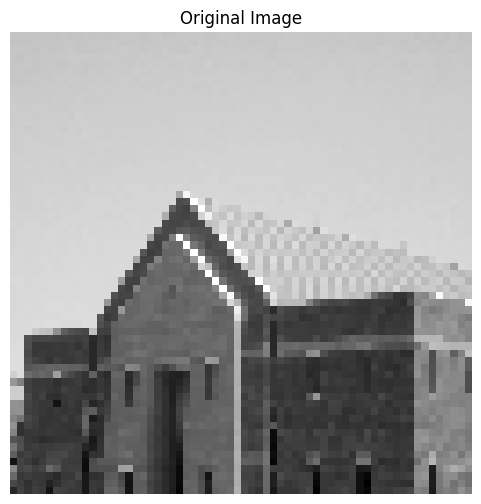

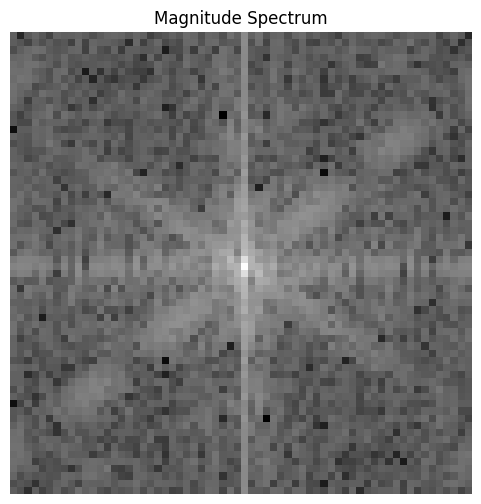

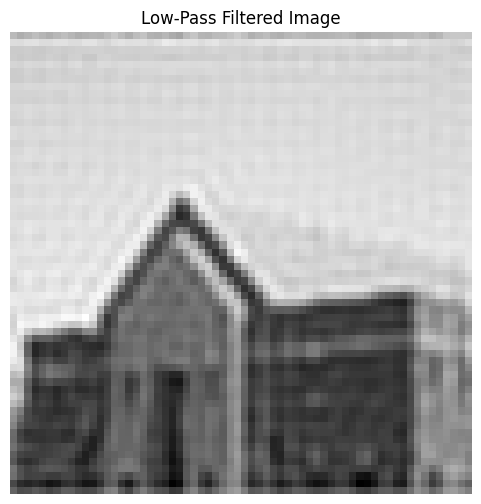

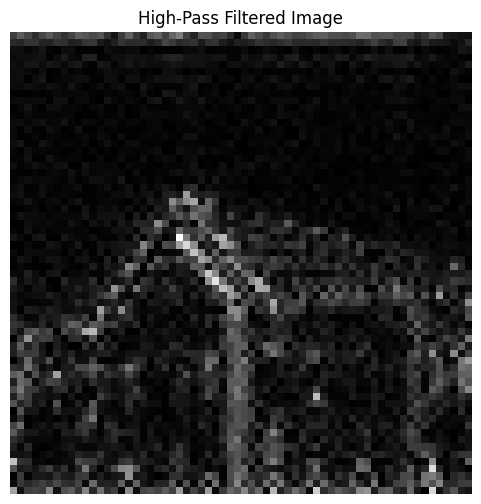

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def main():
    # Load the image in grayscale
    image_path = 'house.tif'
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 64x64 or 128x128 pixels
    image = cv2.resize(image, (64, 64))

    # Display the original image
    plt.figure(figsize=(6, 6))
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

    ## Task 1: Compute the Fourier Transform of the Image

    # Compute the DFT of the image
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

    # Shift the zero-frequency component to the center
    dft_shifted = np.fft.fftshift(dft)

    # Compute the magnitude spectrum
    magnitude_spectrum = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])

    # Apply logarithmic transformation
    magnitude_spectrum_log = np.log(1 + magnitude_spectrum)

    # Normalize the magnitude spectrum for display
    magnitude_spectrum_norm = cv2.normalize(magnitude_spectrum_log, None, 0, 255, cv2.NORM_MINMAX)
    magnitude_spectrum_norm = np.uint8(magnitude_spectrum_norm)

    # Display the magnitude spectrum
    plt.figure(figsize=(6, 6))
    plt.title('Magnitude Spectrum')
    plt.imshow(magnitude_spectrum_norm, cmap='gray')
    plt.axis('off')
    plt.show()

    ## Task 2: Apply Filters in the Frequency Domain

    # Get image dimensions
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2  # Center of the image

    # Create a Low-Pass Filter mask
    D0 = 20  # Cutoff frequency
    mask_LP = np.zeros((rows, cols, 2), np.uint8)
    cv2.circle(mask_LP, (ccol, crow), D0, (1, 1), thickness=-1)

    # Apply the Low-Pass Filter mask to the shifted DFT
    fshift_LP = dft_shifted * mask_LP

    # Inverse shift to bring the zero frequency component back to the original place
    f_ishift_LP = np.fft.ifftshift(fshift_LP)

    # Compute the inverse DFT to get the filtered image back in spatial domain
    img_back_LP = cv2.idft(f_ishift_LP)
    img_back_LP = cv2.magnitude(img_back_LP[:, :, 0], img_back_LP[:, :, 1])

    # Normalize and display the Low-Pass Filtered image
    img_back_LP_norm = cv2.normalize(img_back_LP, None, 0, 255, cv2.NORM_MINMAX)
    img_back_LP_norm = np.uint8(img_back_LP_norm)

    plt.figure(figsize=(6, 6))
    plt.title('Low-Pass Filtered Image')
    plt.imshow(img_back_LP_norm, cmap='gray')
    plt.axis('off')
    plt.show()

    # Create a High-Pass Filter mask
    mask_HP = np.ones((rows, cols, 2), np.uint8)
    cv2.circle(mask_HP, (ccol, crow), D0, (0, 0), thickness=-1)

    # Apply the High-Pass Filter mask to the shifted DFT
    fshift_HP = dft_shifted * mask_HP

    # Inverse shift and compute the inverse DFT
    f_ishift_HP = np.fft.ifftshift(fshift_HP)
    img_back_HP = cv2.idft(f_ishift_HP)
    img_back_HP = cv2.magnitude(img_back_HP[:, :, 0], img_back_HP[:, :, 1])

    # Normalize and display the High-Pass Filtered image
    img_back_HP_norm = cv2.normalize(img_back_HP, None, 0, 255, cv2.NORM_MINMAX)
    img_back_HP_norm = np.uint8(img_back_HP_norm)

    plt.figure(figsize=(6, 6))
    plt.title('High-Pass Filtered Image')
    plt.imshow(img_back_HP_norm, cmap='gray')
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    main()

Task 3.2

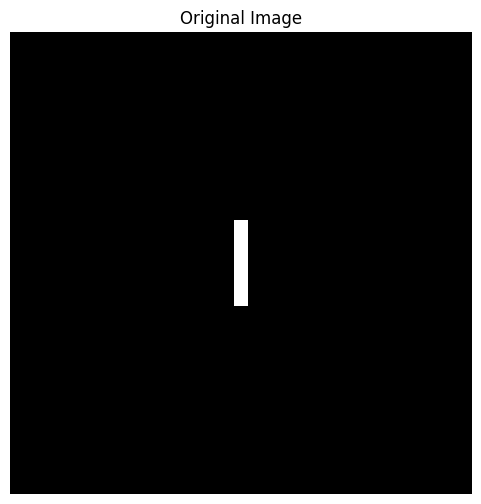

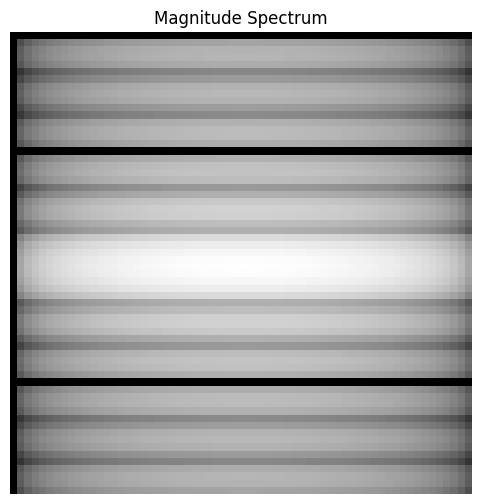

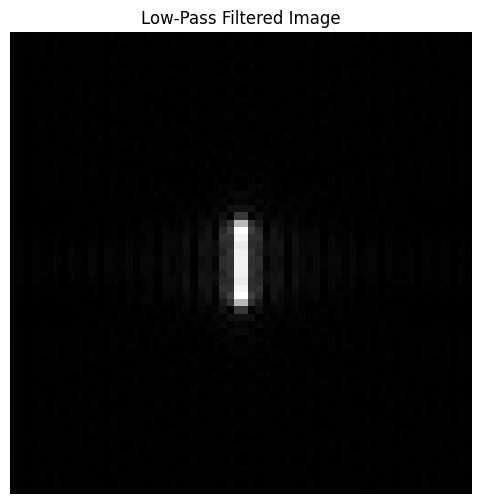

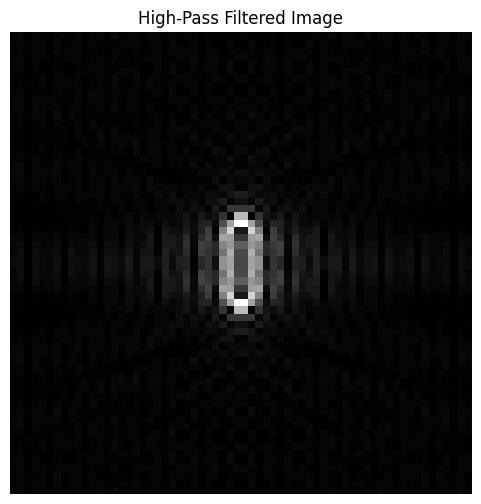

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def main():
    # Load the image in grayscale
    image_path = 'rect1.tif'
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 64x64 or 128x128 pixels
    image = cv2.resize(image, (64, 64))

    # Display the original image
    plt.figure(figsize=(6, 6))
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

    ## Task 1: Compute the Fourier Transform of the Image

    # Compute the DFT of the image
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

    # Shift the zero-frequency component to the center
    dft_shifted = np.fft.fftshift(dft)

    # Compute the magnitude spectrum
    magnitude_spectrum = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])

    # Apply logarithmic transformation
    magnitude_spectrum_log = np.log(1 + magnitude_spectrum)

    # Normalize the magnitude spectrum for display
    magnitude_spectrum_norm = cv2.normalize(magnitude_spectrum_log, None, 0, 255, cv2.NORM_MINMAX)
    magnitude_spectrum_norm = np.uint8(magnitude_spectrum_norm)

    # Display the magnitude spectrum
    plt.figure(figsize=(6, 6))
    plt.title('Magnitude Spectrum')
    plt.imshow(magnitude_spectrum_norm, cmap='gray')
    plt.axis('off')
    plt.show()

    ## Task 2: Apply Filters in the Frequency Domain

    # Get image dimensions
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2  # Center of the image

    # Create a Low-Pass Filter mask
    D0 = 20  # Cutoff frequency
    mask_LP = np.zeros((rows, cols, 2), np.uint8)
    cv2.circle(mask_LP, (ccol, crow), D0, (1, 1), thickness=-1)

    # Apply the Low-Pass Filter mask to the shifted DFT
    fshift_LP = dft_shifted * mask_LP

    # Inverse shift to bring the zero frequency component back to the original place
    f_ishift_LP = np.fft.ifftshift(fshift_LP)

    # Compute the inverse DFT to get the filtered image back in spatial domain
    img_back_LP = cv2.idft(f_ishift_LP)
    img_back_LP = cv2.magnitude(img_back_LP[:, :, 0], img_back_LP[:, :, 1])

    # Normalize and display the Low-Pass Filtered image
    img_back_LP_norm = cv2.normalize(img_back_LP, None, 0, 255, cv2.NORM_MINMAX)
    img_back_LP_norm = np.uint8(img_back_LP_norm)

    plt.figure(figsize=(6, 6))
    plt.title('Low-Pass Filtered Image')
    plt.imshow(img_back_LP_norm, cmap='gray')
    plt.axis('off')
    plt.show()

    # Create a High-Pass Filter mask
    mask_HP = np.ones((rows, cols, 2), np.uint8)
    cv2.circle(mask_HP, (ccol, crow), D0, (0, 0), thickness=-1)

    # Apply the High-Pass Filter mask to the shifted DFT
    fshift_HP = dft_shifted * mask_HP

    # Inverse shift and compute the inverse DFT
    f_ishift_HP = np.fft.ifftshift(fshift_HP)
    img_back_HP = cv2.idft(f_ishift_HP)
    img_back_HP = cv2.magnitude(img_back_HP[:, :, 0], img_back_HP[:, :, 1])

    # Normalize and display the High-Pass Filtered image
    img_back_HP_norm = cv2.normalize(img_back_HP, None, 0, 255, cv2.NORM_MINMAX)
    img_back_HP_norm = np.uint8(img_back_HP_norm)

    plt.figure(figsize=(6, 6))
    plt.title('High-Pass Filtered Image')
    plt.imshow(img_back_HP_norm, cmap='gray')
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    main()

Task 3.3

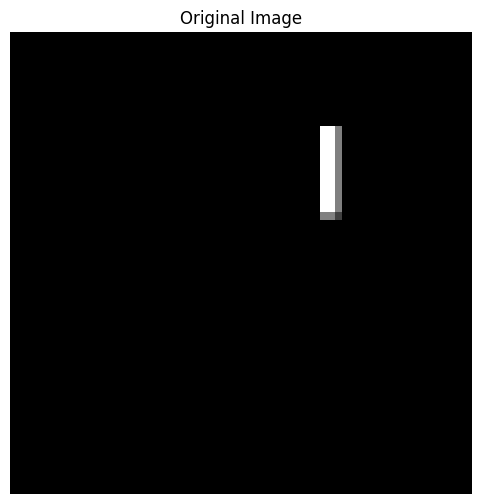

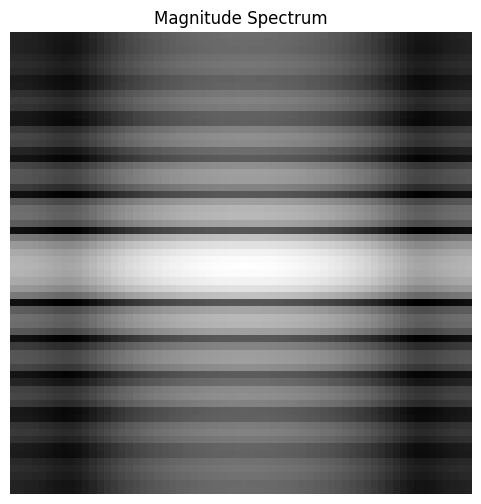

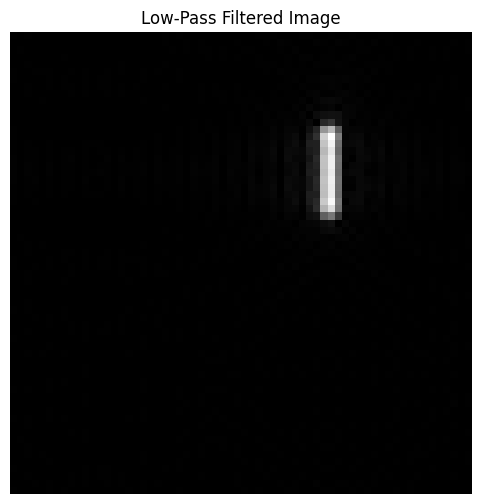

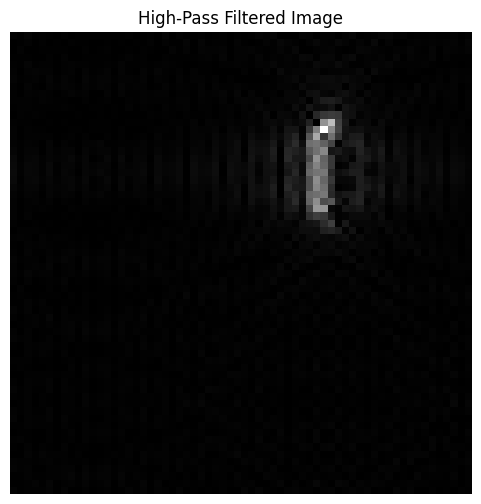

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def main():
    # Load the image in grayscale
    image_path = 'rect2.tif'
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 64x64 or 128x128 pixels
    image = cv2.resize(image, (64, 64))

    # Display the original image
    plt.figure(figsize=(6, 6))
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

    ## Task 1: Compute the Fourier Transform of the Image

    # Compute the DFT of the image
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

    # Shift the zero-frequency component to the center
    dft_shifted = np.fft.fftshift(dft)

    # Compute the magnitude spectrum
    magnitude_spectrum = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])

    # Apply logarithmic transformation
    magnitude_spectrum_log = np.log(1 + magnitude_spectrum)

    # Normalize the magnitude spectrum for display
    magnitude_spectrum_norm = cv2.normalize(magnitude_spectrum_log, None, 0, 255, cv2.NORM_MINMAX)
    magnitude_spectrum_norm = np.uint8(magnitude_spectrum_norm)

    # Display the magnitude spectrum
    plt.figure(figsize=(6, 6))
    plt.title('Magnitude Spectrum')
    plt.imshow(magnitude_spectrum_norm, cmap='gray')
    plt.axis('off')
    plt.show()

    ## Task 2: Apply Filters in the Frequency Domain

    # Get image dimensions
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2  # Center of the image

    # Create a Low-Pass Filter mask
    D0 = 20  # Cutoff frequency
    mask_LP = np.zeros((rows, cols, 2), np.uint8)
    cv2.circle(mask_LP, (ccol, crow), D0, (1, 1), thickness=-1)

    # Apply the Low-Pass Filter mask to the shifted DFT
    fshift_LP = dft_shifted * mask_LP

    # Inverse shift to bring the zero frequency component back to the original place
    f_ishift_LP = np.fft.ifftshift(fshift_LP)

    # Compute the inverse DFT to get the filtered image back in spatial domain
    img_back_LP = cv2.idft(f_ishift_LP)
    img_back_LP = cv2.magnitude(img_back_LP[:, :, 0], img_back_LP[:, :, 1])

    # Normalize and display the Low-Pass Filtered image
    img_back_LP_norm = cv2.normalize(img_back_LP, None, 0, 255, cv2.NORM_MINMAX)
    img_back_LP_norm = np.uint8(img_back_LP_norm)

    plt.figure(figsize=(6, 6))
    plt.title('Low-Pass Filtered Image')
    plt.imshow(img_back_LP_norm, cmap='gray')
    plt.axis('off')
    plt.show()

    # Create a High-Pass Filter mask
    mask_HP = np.ones((rows, cols, 2), np.uint8)
    cv2.circle(mask_HP, (ccol, crow), D0, (0, 0), thickness=-1)

    # Apply the High-Pass Filter mask to the shifted DFT
    fshift_HP = dft_shifted * mask_HP

    # Inverse shift and compute the inverse DFT
    f_ishift_HP = np.fft.ifftshift(fshift_HP)
    img_back_HP = cv2.idft(f_ishift_HP)
    img_back_HP = cv2.magnitude(img_back_HP[:, :, 0], img_back_HP[:, :, 1])

    # Normalize and display the High-Pass Filtered image
    img_back_HP_norm = cv2.normalize(img_back_HP, None, 0, 255, cv2.NORM_MINMAX)
    img_back_HP_norm = np.uint8(img_back_HP_norm)

    plt.figure(figsize=(6, 6))
    plt.title('High-Pass Filtered Image')
    plt.imshow(img_back_HP_norm, cmap='gray')
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    main()

Task 3.4

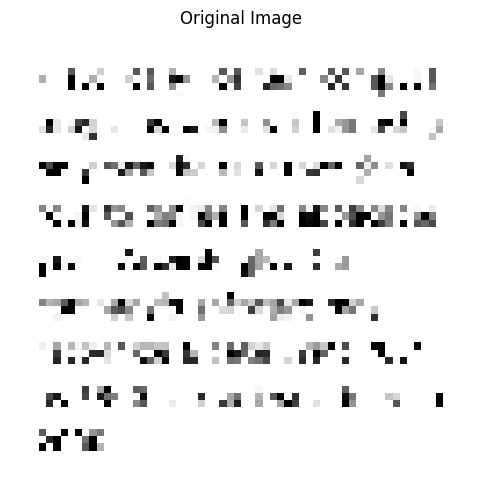

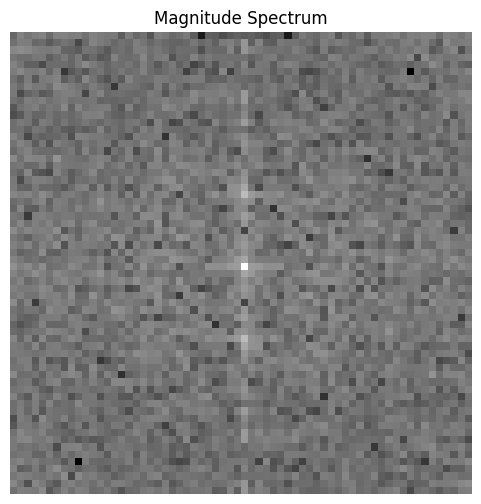

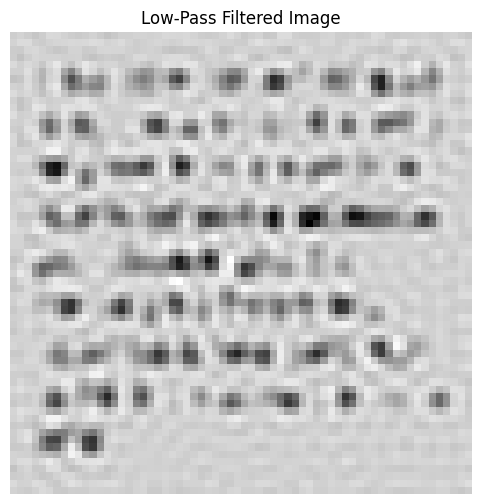

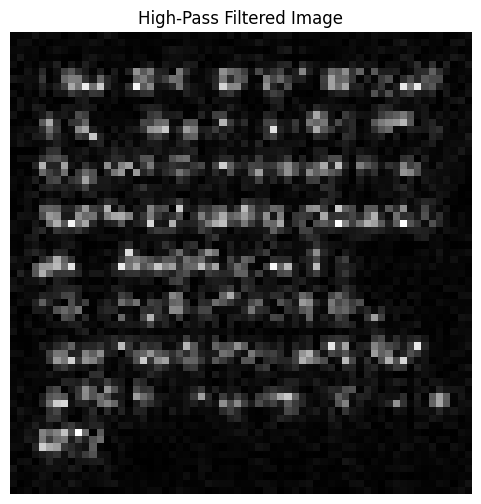

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def main():
    # Load the image in grayscale
    image_path = 'text.tif'
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 64x64 or 128x128 pixels
    image = cv2.resize(image, (64, 64))

    # Display the original image
    plt.figure(figsize=(6, 6))
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

    ## Task 1: Compute the Fourier Transform of the Image

    # Compute the DFT of the image
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

    # Shift the zero-frequency component to the center
    dft_shifted = np.fft.fftshift(dft)

    # Compute the magnitude spectrum
    magnitude_spectrum = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])

    # Apply logarithmic transformation
    magnitude_spectrum_log = np.log(1 + magnitude_spectrum)

    # Normalize the magnitude spectrum for display
    magnitude_spectrum_norm = cv2.normalize(magnitude_spectrum_log, None, 0, 255, cv2.NORM_MINMAX)
    magnitude_spectrum_norm = np.uint8(magnitude_spectrum_norm)

    # Display the magnitude spectrum
    plt.figure(figsize=(6, 6))
    plt.title('Magnitude Spectrum')
    plt.imshow(magnitude_spectrum_norm, cmap='gray')
    plt.axis('off')
    plt.show()

    ## Task 2: Apply Filters in the Frequency Domain

    # Get image dimensions
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2  # Center of the image

    # Create a Low-Pass Filter mask
    D0 = 20  # Cutoff frequency
    mask_LP = np.zeros((rows, cols, 2), np.uint8)
    cv2.circle(mask_LP, (ccol, crow), D0, (1, 1), thickness=-1)

    # Apply the Low-Pass Filter mask to the shifted DFT
    fshift_LP = dft_shifted * mask_LP

    # Inverse shift to bring the zero frequency component back to the original place
    f_ishift_LP = np.fft.ifftshift(fshift_LP)

    # Compute the inverse DFT to get the filtered image back in spatial domain
    img_back_LP = cv2.idft(f_ishift_LP)
    img_back_LP = cv2.magnitude(img_back_LP[:, :, 0], img_back_LP[:, :, 1])

    # Normalize and display the Low-Pass Filtered image
    img_back_LP_norm = cv2.normalize(img_back_LP, None, 0, 255, cv2.NORM_MINMAX)
    img_back_LP_norm = np.uint8(img_back_LP_norm)

    plt.figure(figsize=(6, 6))
    plt.title('Low-Pass Filtered Image')
    plt.imshow(img_back_LP_norm, cmap='gray')
    plt.axis('off')
    plt.show()

    # Create a High-Pass Filter mask
    mask_HP = np.ones((rows, cols, 2), np.uint8)
    cv2.circle(mask_HP, (ccol, crow), D0, (0, 0), thickness=-1)

    # Apply the High-Pass Filter mask to the shifted DFT
    fshift_HP = dft_shifted * mask_HP

    # Inverse shift and compute the inverse DFT
    f_ishift_HP = np.fft.ifftshift(fshift_HP)
    img_back_HP = cv2.idft(f_ishift_HP)
    img_back_HP = cv2.magnitude(img_back_HP[:, :, 0], img_back_HP[:, :, 1])

    # Normalize and display the High-Pass Filtered image
    img_back_HP_norm = cv2.normalize(img_back_HP, None, 0, 255, cv2.NORM_MINMAX)
    img_back_HP_norm = np.uint8(img_back_HP_norm)

    plt.figure(figsize=(6, 6))
    plt.title('High-Pass Filtered Image')
    plt.imshow(img_back_HP_norm, cmap='gray')
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    main()